In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

# print("Path to dataset files:", path)

In [53]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv(path + "/Titanic-dataset.csv")
# Display the first few rows of the dataset

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# Check for missing values in the dataset
missing_values = titanic_data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [55]:
#Drop the columns with irrelevant data
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [63]:
# Reagange the features
titanic_data = titanic_data[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']]

NameError: name 'X' is not defined

In [61]:
# Remove duplicates from the dataset
titanic_data = titanic_data.drop_duplicates()

In [57]:
# Split the dataset into survived and non-survived groups
survived_data = titanic_data[titanic_data['Survived'] == True].copy()
non_survived_data = titanic_data[titanic_data['Survived'] == False].copy()

# Function to fill missing values
def fill_missing_values(data):
    data['Age'] = data['Age'].fillna(data['Age'].mean().round(0))
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    return data

# Fill missing values for both datasets
survived_data = fill_missing_values(survived_data)
non_survived_data = fill_missing_values(non_survived_data)

# Merge the two datasets back together
titanic_data = pd.concat([survived_data, non_survived_data])

# Optionally, reset the index
titanic_data.reset_index(drop=True, inplace=True)

# Shuffle the dataset
titanic_data = titanic_data.sample(frac=1, random_state=42).reset_index(drop=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,3,male,36.0,1,0,15.5500,S
1,False,2,male,51.0,0,0,12.5250,S
2,False,3,male,39.0,0,0,24.1500,S
3,False,3,male,21.0,0,0,16.1000,S
4,True,1,male,23.0,0,1,63.3583,C


Need edit

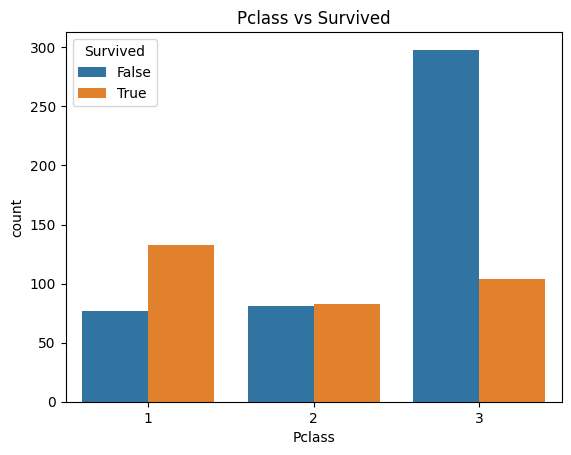

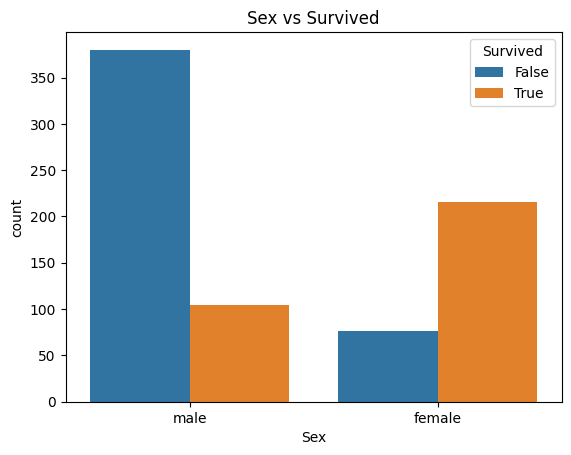

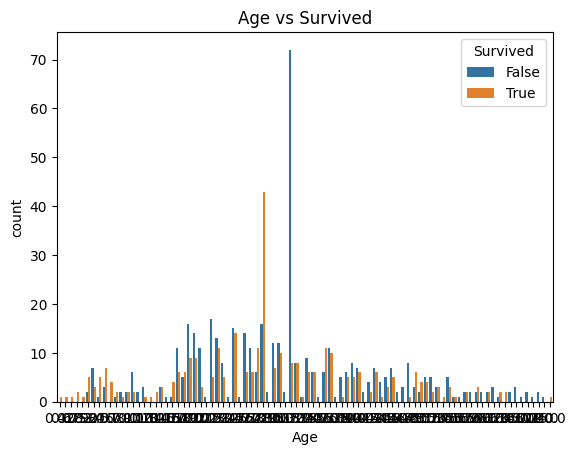

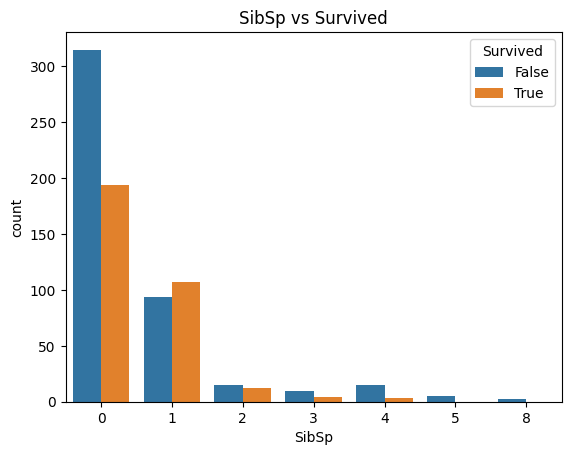

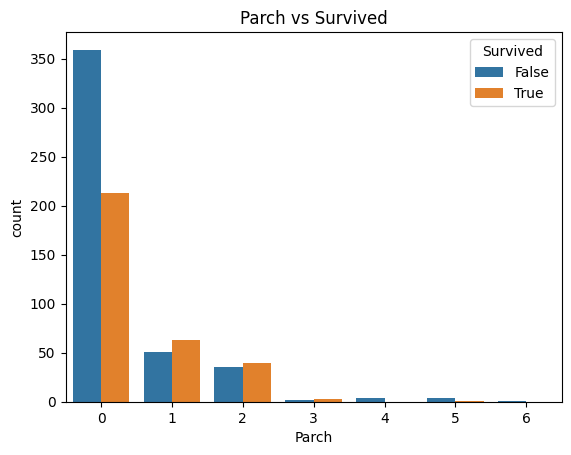

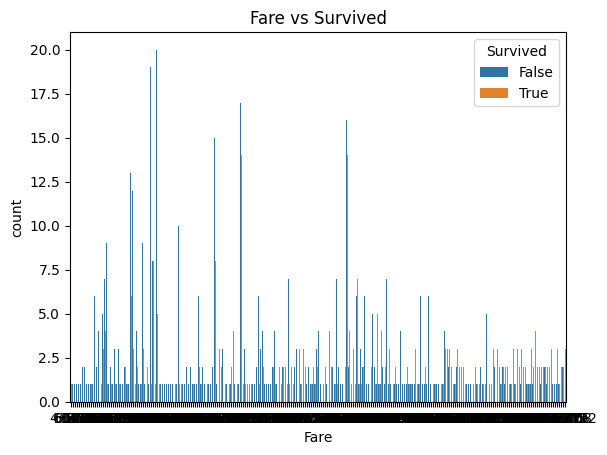

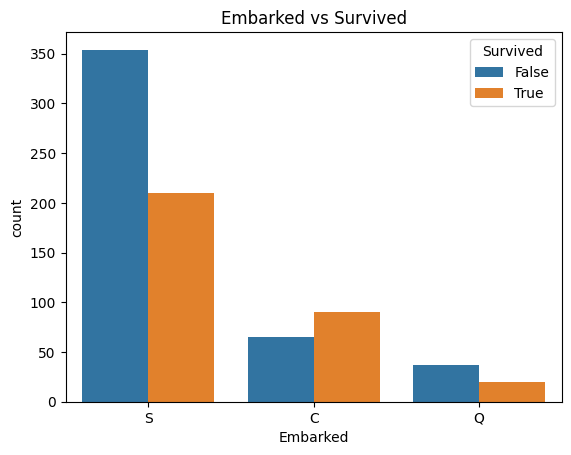

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable for each feature using bar plots
for column in titanic_data.columns:
    if column != 'Survived':
        plt.figure()
        sns.countplot(x=column, hue='Survived', data=titanic_data)
        plt.title(f'{column} vs Survived')
        plt.show()

In [58]:
# Add the dataset to a csv file
titanic_data.to_csv("titanic_data.csv", index=False)